In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split # sklearn package's randomized data splitting function


In [53]:
cData = pd.read_csv("auto-mpg.csv")

In [54]:
# 8 variables 

cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [55]:
# dropping/ignoring car_nme 

cData = cData.drop('car name', axis=1)
# also replacing the categorical var with actual values 
cData['origin'] = cData['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


## Create Dummy Variables 

Values like 'america' cannot be read into an equation. Using substitutes like 1 for america, 2 for europe and 3 for asia would end up implying that european car fall exactly half way better american and asian cars! we don't want to impose such a baseless assumption.  

So we create 3 simple true or false columns with titles equivalent to 'is this car america?', 'is this car european?' and 'is this car asian?'. These will be used as independent variables without imposing any kind of ordering between the three regions. 


In [56]:
# one-hot-encoding of 'origin' column
cData = pd.get_dummies(cData, columns=['origin'])
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


## Dealing with Missing Values

In [74]:
# Summar of the dataset
cData.describe()



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [58]:
cData.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

Note: horsepower is being regarded as an object even though it is a number. 

In [59]:
hpIsDigit = pd.DataFrame(cData.horsepower.str.isdigit()) # if the string is made of digits store True else False

cData[hpIsDigit['horsepower'] == False] # from temp take only those rows where hp is false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [60]:
# Missing values have a '?'
# Replace missing values with NaN 

cData = cData.replace('?', np.nan)
cData[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [61]:
# instead of dropping the rows, lets replace the missing values with a median value. 
cData.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [76]:
# replace the missing values with median value 
# Note, we do not need to specify the column names below 
# Every column's missing value is replaced with that column's median respectively (axis = 0 means columnwise)
# cData = cData.fillna(cData.median())


# fill missing values of every column with its median
medianFiller = lambda x: x.fillna(x.median())
cData = cData.apply(medianFiller, axis = 0)

# converts the columne of 'horsepower' to float64 type
cData['horsepower'] = cData['horsepower'].astype('float64') # converting the hp column from object / string type

# Bivariate Plots 

You get a sense of where the variables are and whether they're linear to each other or not. 

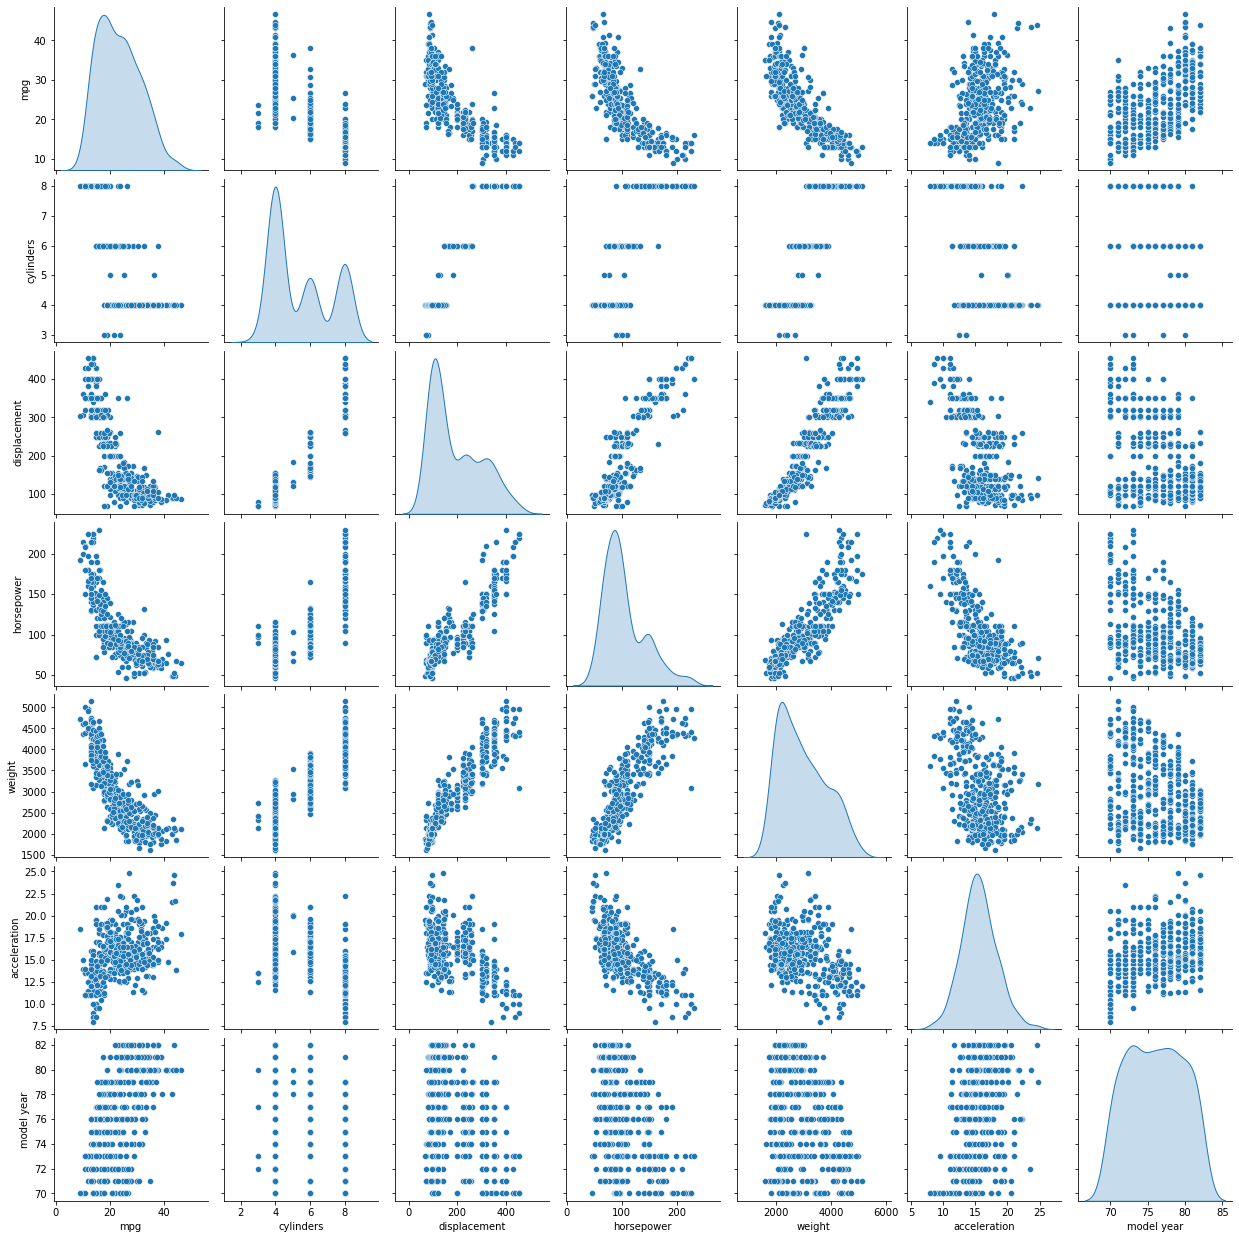

In [63]:
cData_attr = cData.iloc[:,0:7]
sns.pairplot(cData_attr, diag_kind='kde') # to plot density curve instead of histogram on the diag

# Split Data 

In [64]:
# lets build our linear model 
# independent variables 
x = cData.drop(['mpg', 'origin_europe'], axis=1)

# dependent  variables 
y = cData[["mpg"]]

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state =1)

In [66]:
regression_model = LinearRegression()
regression_model.fit (x_train, y_train)



LinearRegression()

In [67]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.39480796616482755
The coefficient for displacement is 0.028945510765487483
The coefficient for horsepower is -0.021752207723547305
The coefficient for weight is -0.007352032065147348
The coefficient for acceleration is 0.06191936600761846
The coefficient for model year is 0.8369338917645011
The coefficient for origin_america is -3.001283000918516
The coefficient for origin_asia is -0.6060179643247399


In [68]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -18.283451116372195


The score (R^2) for an in-sample and out of sample 

In [69]:
# R^2 on the test data set
regression_model.score(x_test, y_test)

0.8433135132808829

In [70]:
# R^2 on the training data set
regression_model.score(x_train, y_train)

0.8141025501610559

# adding interaction terms 


In [71]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model 

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()


poly_clf.fit(x_train2,y_train)

y_pred = poly_clf.predict(x_test2)

# print(y_pred)

# In sample (training) R^2 will always improve with the number of variables 
print(poly_clf.score(x_train2, y_train))

0.9015975295395283


In [72]:
print(poly_clf.score(x_test2, y_test))
      

0.8647441063323938


In [73]:
print(x_train.shape)
print(x_train2.shape)

(278, 8)
(278, 37)


False: The addition of polynomial terms will increase the complexity of the model, and as a result the model performance on test data will always increase 

True: A complex model has higher chances of overfitting due to which performances on the test data might decrease.